<a href="https://colab.research.google.com/github/cristinapopescu19/Projects/blob/An-num/Exc3_Popescu_Cristina_grupa_322.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EX\#1 (a) Să se construiască în Python funcţia MetNeville care are ca date de intrare:
- $f$ - funcţia care este aproximată;
- $a, b$ - capetele intervalului;
- $n$ - gradul polinomului de interpolare Lagrange $P_n$;
- $x$ - punctul în care se evaluează polinomul de interpolare Lagrange $P_n$; şi care returnează:
- $y$ - valoarea polinomului de interpolare Lagrange $P_n$ in punctul $x$, i.e. $y=P_n(x)$; obţinute prin metoda/algoritmul lui Neville, cu noduri de interpolare echidistante în intervalul $[a, b]$.

(b) Fie următoarele date: $f(x)=\mathrm{e}^{2 x}, a=-1, b=1$ şi $n \in\{1,2,3,4\}$.

(b1) Pentru datele de mai sus şi folosind funcţia MetNeville, determinaţi polinomul de interpolare Lagrange $P_n(x), n \in\{1,2,3,4\}$.

(b2) Reprezentaţi, în aceeaşi figură, graficul funcţiei $f$ şi cel al polinomului de interpolare Lagrange $P_n, n \in\{1,2,3,4\}$, obţinut prin metoda/algoritmul lui Neville, cu noduri de interpolare echidistante în intervalul $[a, b]$.

(b3) Evaluaţi funcţia eroare absolută $\operatorname{ErrAbs}(x)=\left|f(x)-P_n(x)\right|, x \in[-1,1]$, $n \in\{1,2,3,4\}$, şi construiţi graficul său într-o altă figură.

Valoarea polinomului de interpolare Lagrange Pn pt n = 1 este: 5.575625895007141
Valoarea polinomului de interpolare Lagrange Pn pt n = 2 este: 3.503979126694417
Valoarea polinomului de interpolare Lagrange Pn pt n = 3 este: 2.8171433689737815
Valoarea polinomului de interpolare Lagrange Pn pt n = 4 este: 2.718281828459045


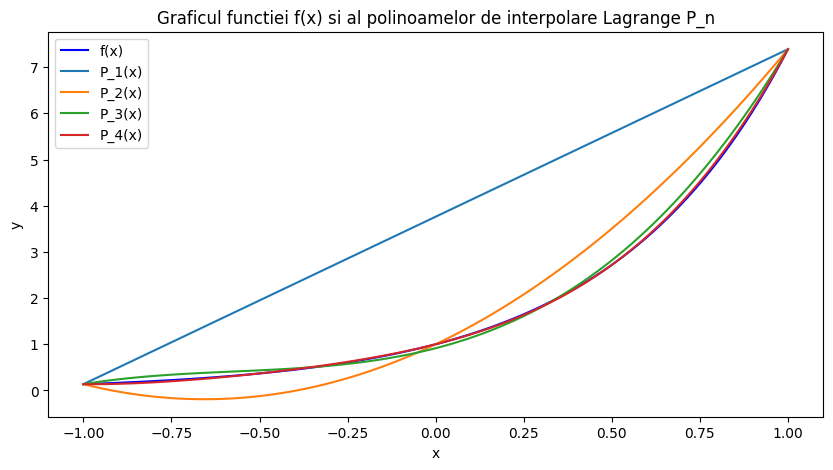

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def MetNeville(f, a, b, n, x, X, Q):
    h = (b - a) / n
    Q = np.zeros((n + 1, n + 1)) # Initializarea matricei Q

    # Calculul valorilor Q0,0, Q1,0, ..., Qn,0
    for i in range(n + 1):
        X[i] = a + i * h
        Q[i][0] = f(X[i])

    # Calculul matricei Q
    for i in range(1, n + 1):
        for j in range(1, i + 1):
            Q[i][j] = (Q[i][j-1]*(x - X[i-j]) - Q[i-1][j-1]*(x-X[i])) / (X[i]- X[i-j])
    Pn = Q[n][n]

    return Pn

# b)
def f(x):
    return np.exp(2*x)
a = -1
b = 1
for n in range(1,5):
    x = 0.5
    Q = np.zeros((n+1,n+1))
    X = np.linspace(a, b, n + 1)
    r = MetNeville(f, a, b, n, x, X,Q)
    print(f"Valoarea polinomului de interpolare Lagrange Pn pt n = {n} este: {r}")

#b2)
x_val = np.linspace(a, b, 100)
y_val = f(x_val)
plt.figure(figsize=(10, 5))
plt.plot(x_val, y_val, label='f(x)', color='blue')
for n in range(1,5):
    y_val_Pn = [MetNeville(f, a, b, n, x, X, Q) for x in x_val]
    plt.plot(x_val, y_val_Pn, label=f'P_{n}(x)', linestyle='-')

plt.legend()
plt.title('Graficul functiei f(x) si al polinoamelor de interpolare Lagrange P_n')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Text(0, 0.5, 'Eroare absoluta')

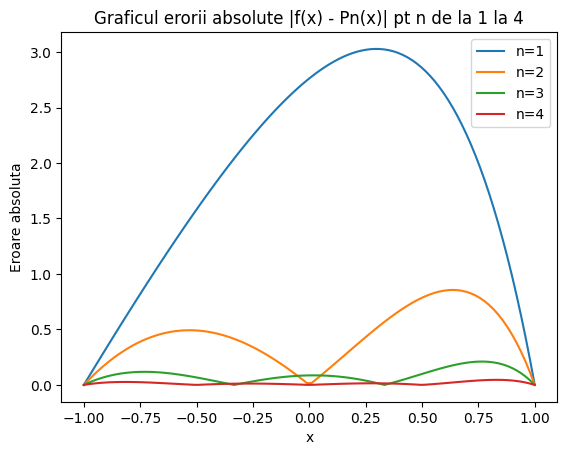

In [ ]:
for n in range(1,5):
    y_val_Pn = [MetNeville(f, a, b, n, x, X, Q) for x in x_val]
    error_vals = np.abs(f(x_val) - y_val_Pn)
    plt.plot(x_val, error_vals, label=f'n={n}')
plt.legend()
plt.title('Graficul erorii absolute |f(x) - Pn(x)| pt n de la 1 la 4')
plt.xlabel('x')
plt.ylabel('Eroare absoluta')

EX\#1 Lab 8 (a) Să se construiască în Python funcţia $\operatorname{SplineLiniar}(f, a, b, n)$ care are ca date de intrare:
- $f$ - funcţia care este aproximată;
- $a, b$ - capetele intervalului;
- $n$ - numărul de subintervale $\left[x_j, x_{j+1}\right) \subset[a, b], j=\overline{1, n}$, de lungimi egale;
- $x$ - punctul în care se evaluează funcţia spline;
şi care returnează:
- $y$ - valoarea funcţiei spline liniare în punctul $x \in[a, b]$, i.e. $y=S_j(x)=a_j+$ $b_j\left(x-x_j\right)$ pentru $x \in\left[x_j, x_{j+1}\right), j=\overline{1, n}$.

(b) Fie $f(x)=\mathrm{e}^{2 x}, a=-1, b=1$ şi $n=5$. Reprezentaţi, în aceeaşi figură, graficele funcţiilor $f$ şi $S_j, j=\overline{1, n}$, prin apelarea funcţiei SplineLiniar.

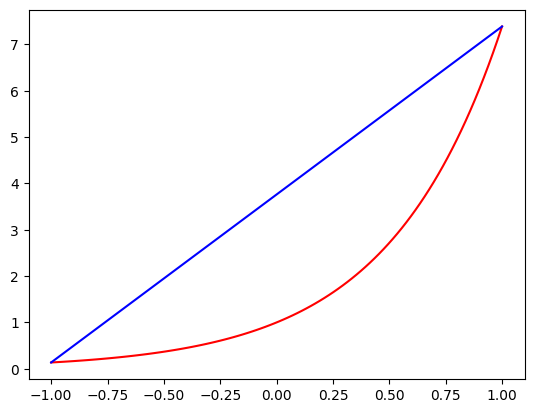

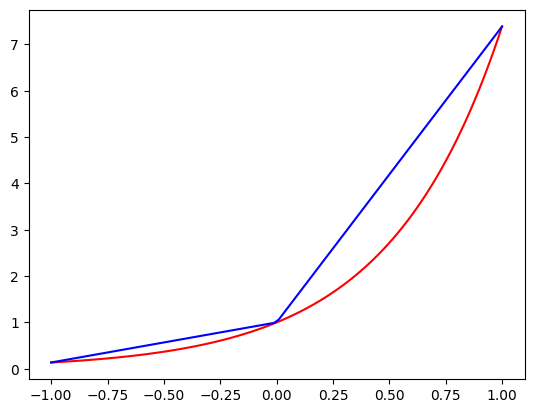

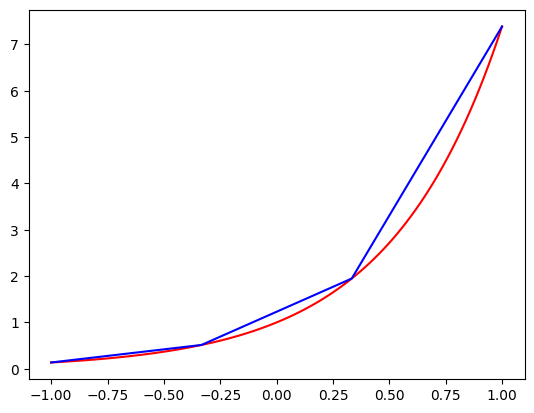

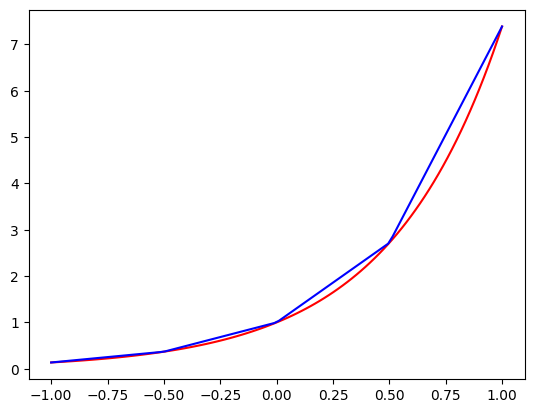

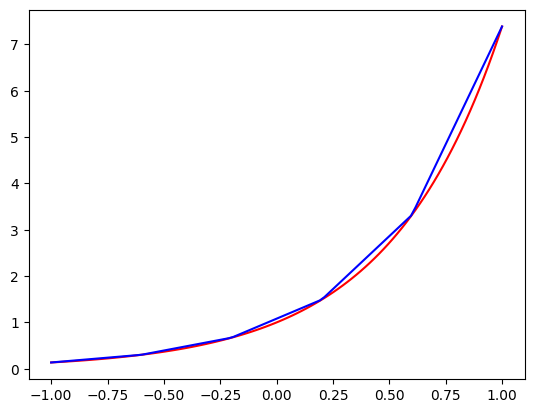

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(2 * x)
a = -1
b = 1

def SplineLiniar(f, a, b, n, x):
    j = np.floor((x - a) / (b - a) * n) #determin intervalul în care se află punctul x în intervalul [a, b]
                                        #și ii dau un indice corespunzător în interpolare.
    xj = a + j * (b - a) / n # partea din stanga intervalului in care se află x.
    xj_nod = xj + (b - a) / n # partea din dreapta intervalului în care se află x.
    bj = (f(xj_nod) - f(xj)) / (xj_nod - xj) #panta pentru segmentul dintre xj și xj_nod
    aj = f(xj)
    return aj + bj * (x - xj) #valoarea interpolata
t = np.linspace(a,b,100)
for i in range(1, 6):
    plt.figure(i)
    plt.plot(t, [f(x) for x in t], 'r')
    plt.plot(t, [SplineLiniar(f, a, b, i, x) for x in t], 'b')
    plt.show()